<a href="https://colab.research.google.com/github/riddhikaa/csir_npl_work/blob/main/PCA_ON_Highly_Expressed_genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path = '/content/drive/MyDrive/breastcancer_data/original_Breast_GSE70947.xlsx'
df = pd.read_excel(file_path)


In [ ]:
df.head()

,samples,type,NM_144987,NM_013290,ENST00000322831,NM_001625,lincRNA:chr7:226042-232442_R,NM_032391,ENST00000238571,XR_108906,...,NM_207327,NM_001004477,NM_020700,NM_005895,NM_000679,NR_003529,NR_036446,NM_001001957,lincRNA:chr7:29652000-29661000_R,ENST00000494108
0,GSM1823702_252800417016_S01_GE1_107_Sep09_1_2,normal,8.693318,7.718016,6.044438,10.747077,9.133777,4.735581,5.634732,4.670231,...,10.453202,4.376090,5.597596,11.860087,11.321528,4.486530,5.489959,5.810069,4.834056,4.383929
1,GSM1823703_252800417016_S01_GE1_107_Sep09_2_1,normal,9.375980,7.072232,6.976741,10.429671,9.526500,5.221089,5.425187,4.860931,...,10.066372,4.383785,5.404546,11.636828,8.283747,4.770318,5.345571,4.457930,4.441395,4.411587
2,GSM1823704_252800416877_S01_GE1_107_Sep09_2_3,normal,8.943442,7.964573,6.269055,10.825025,9.396855,5.258506,5.824921,4.964604,...,10.380676,4.428892,5.356374,12.031338,9.420630,4.394069,5.851030,4.508072,4.568262,4.316081
3,GSM1823705_252800416894_S01_GE1_107_Sep09_1_1,normal,9.020798,7.824639,6.165165,11.646788,8.776462,4.648655,6.676692,4.770186,...,10.509871,4.381542,5.757179,11.944607,10.311339,4.451118,6.117379,4.505663,4.413361,4.537626
4,GSM1823706_252800416894_S01_GE1_107_Sep09_1_3,normal,8.806154,7.555348,6.230969,11.635247,8.911383,4.518054,6.520691,4.540453,...,10.552841,4.386116,6.851058,11.976510,10.904219,4.432566,6.286439,4.540453,4.412933,4.452250


In [ ]:
target = "type"
val_counts = df[target].value_counts()
print(val_counts, "\n\n")

type
normal                   146
breast_adenocarcinoma    143
Name: count, dtype: int64 




In [ ]:
print("these are the genes :\n",df.columns)
labels=[]
for i in df.columns:
  labels.append(i)

labels.remove('samples') # removing sample label

these are the genes :
 Index(['samples', 'type', 'NM_144987', 'NM_013290', 'ENST00000322831',
       'NM_001625', 'lincRNA:chr7:226042-232442_R', 'NM_032391',
       'ENST00000238571', 'XR_108906',
       ...
       'NM_207327', 'NM_001004477', 'NM_020700', 'NM_005895', 'NM_000679',
       'NR_003529', 'NR_036446', 'NM_001001957',
       'lincRNA:chr7:29652000-29661000_R', 'ENST00000494108'],
      dtype='object', length=16384)


In [ ]:
labels

['type',
 'NM_144987',
 'NM_013290',
 'ENST00000322831',
 'NM_001625',
 'lincRNA:chr7:226042-232442_R',
 'NM_032391',
 'ENST00000238571',
 'XR_108906',
 'NM_005937',
 'NM_152493',
 'lincRNA:chr8:104254399-104295074_F',
 'NM_014736',
 'ENST00000414816',
 'NM_017871',
 'NR_028328',
 'NM_000266',
 'NM_182501',
 'NM_174905',
 'ERCC-00071_128',
 'ERCC-00142_99',
 'NM_138783',
 'NM_002610',
 'NM_001916',
 'NM_002196',
 'NM_015411',
 'NM_138330',
 'NM_003725',
 'NM_021804',
 'NM_015326',
 'NM_020974',
 'NM_001005515',
 'NM_001014811',
 'NR_015421',
 'NM_033143',
 'lincRNA:chr8:145986196-145991421_F',
 'NM_176819',
 'NM_006472',
 'lincRNA:chrX:65009725-65085200_R',
 'lincRNA:chr5:124738151-124748189_F',
 'NM_003314',
 'NM_181515',
 'XR_110033',
 'NM_001004453',
 'NM_024074',
 'NM_152778',
 'NM_144670',
 'NM_198468',
 'XR_132725',
 'NM_213653',
 'A_33_P3344521',
 'NM_032553',
 'lincRNA:chr8:101925424-101930749_R',
 'ERCC-00134_68',
 'BC037261',
 'NR_034089',
 'AJ298317',
 'NM_002466',
 'XM_0031

In [ ]:
!pip install category_encoders==2.6.0
import category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 6.2 MB/s eta 0:00:00


In [ ]:
# Encoding categorical features (Ordinal Encoding)

class_map = {"normal": 0, "breast_adenocarcinoma": 1}
class_map_reverse = {m : n for m, n in zip(class_map.values(), class_map.keys())}

encoder = category_encoders.OrdinalEncoder(cols = [target], mapping = [{"col": target, "mapping": class_map}])
df['type'] = encoder.fit_transform(df[target])

In [ ]:
X = df.drop(columns=df.columns[0]).values
y = df[target].values

print(X.shape, y.shape)
print(X)

(289, 16383) (289,)
[[0.         8.69331779 7.71801596 ... 5.81006943 4.83405623 4.38392868]
 [0.         9.37597965 7.07223164 ... 4.45792972 4.44139474 4.41158681]
 [0.         8.94344176 7.96457276 ... 4.50807186 4.56826205 4.31608095]
 ...
 [1.         9.0513847  7.65189288 ... 4.41435052 4.52880797 4.39442035]
 [1.         8.11460641 8.09668189 ... 6.15655541 4.38106974 4.44705215]
 [1.         8.82757478 7.53889842 ... 4.63430652 4.45075149 4.38308807]]


In [ ]:
normal_samples = df[df['type'] == 0]
cancerous_samples = df[df['type'] == 1]

# Calculating mean expression for each gene, excluding the 'type' column
normal_mean_expression = normal_samples[labels].mean(axis=0)
cancerous_mean_expression = cancerous_samples[labels].mean(axis=0)

#highly expressed genes in both groups
top_n = 3750 #top 10,000--> 5000 cancerous and 5000 normal
top_genes_normal = normal_mean_expression.nlargest(top_n)
top_genes_cancerous = cancerous_mean_expression.nlargest(top_n)

print("Top highly expressed genes in normal samples:")
print(top_genes_normal)
print('\n')
print("Top highly expressed genes in cancerous samples:")
print(top_genes_cancerous)

Top highly expressed genes in normal samples:
NM_001195605       18.172377
NM_001033045       17.850794
NM_000518          17.671507
ENST00000361789    17.669676
NM_000150          17.584685
                     ...    
NM_001284           9.508745
NM_213622           9.508425
NM_004292           9.508181
NM_006915           9.507530
NM_213566           9.507498
Length: 3750, dtype: float64


Top highly expressed genes in cancerous samples:
NM_001195605       18.305861
NM_001033045       17.980294
NM_000150          17.724888
ENST00000361789    17.463887
NM_001035267       17.463603
                     ...    
NM_000380           9.492140
NM_018428           9.490993
NM_014884           9.488896
NM_032970           9.488455
NM_006767           9.485907
Length: 3750, dtype: float64


In [ ]:
# df to set
top_genes_normal_set = set(top_genes_normal.index)
top_genes_cancerous_set = set(top_genes_cancerous.index)


# unique genes in normal and cancerous samples
unique_to_normal = top_genes_normal_set - top_genes_cancerous_set
unique_to_cancerous = top_genes_cancerous_set - top_genes_normal_set

print("Genes uniquely highly expressed in normal samples:")
print(unique_to_normal)
print('\n')
print("Genes uniquely highly expressed in cancerous samples:")
print(unique_to_cancerous)

Genes uniquely highly expressed in normal samples:
{'NM_206962', 'NM_001063', 'NM_014424', 'NR_024065', 'NM_178140', 'NM_005424', 'NM_002253', 'NM_014572', 'NM_000261', 'NM_001164379', 'NR_029392', 'NM_000559', 'NM_021095', 'NM_000050', 'NM_000031', 'NM_003507', 'NM_000474', 'NM_003243', 'NM_001164440', 'NM_032784', 'NM_138370', 'NM_018943', 'NM_000629', 'NM_014720', 'NM_213566', 'NM_016496', 'NM_001005404', 'NM_007038', 'NM_173354', 'NM_003251', 'NM_000049', 'NR_002817', 'NM_021069', 'NM_024560', 'NM_012190', 'NM_001128128', 'NM_145246', 'ENST00000415215', 'ENST00000302481', 'NM_007195', 'NM_003803', 'NM_000717', 'NM_175861', 'NM_000148', 'NM_058246', 'NR_024337', 'NM_138782', 'NM_002405', 'NM_000413', 'NM_199334', 'lincRNA:chr12:32553858-32653233_F', 'NM_003273', 'NM_006896', 'NM_181501', 'NM_007006', 'NM_001935', 'NM_001136103', 'NM_006272', 'NM_001007189', 'NM_014702', 'NM_144611', 'NM_007030', 'NM_152793', 'NM_001626', 'NM_001099744', 'NM_032883', 'NM_203330', 'NM_005966', 'NM_017

In [ ]:
# converting set to list
unique_to_normal_list = list(unique_to_normal)
unique_to_cancerous_list = list(unique_to_cancerous)

In [ ]:
unique_to_cancerous_list=unique_to_cancerous_list+['type']
unique_to_normal_list=unique_to_normal_list+['type']

In [ ]:
Cancer_Gene_Expression = df[unique_to_cancerous_list]
Normal_Gene_Expression = df[unique_to_normal_list]

In [ ]:
df

,samples,type,NM_144987,NM_013290,ENST00000322831,NM_001625,lincRNA:chr7:226042-232442_R,NM_032391,ENST00000238571,XR_108906,...,NM_207327,NM_001004477,NM_020700,NM_005895,NM_000679,NR_003529,NR_036446,NM_001001957,lincRNA:chr7:29652000-29661000_R,ENST00000494108
0,GSM1823702_252800417016_S01_GE1_107_Sep09_1_2,0,8.693318,7.718016,6.044438,10.747077,9.133777,4.735581,5.634732,4.670231,...,10.453202,4.376090,5.597596,11.860087,11.321528,4.486530,5.489959,5.810069,4.834056,4.383929
1,GSM1823703_252800417016_S01_GE1_107_Sep09_2_1,0,9.375980,7.072232,6.976741,10.429671,9.526500,5.221089,5.425187,4.860931,...,10.066372,4.383785,5.404546,11.636828,8.283747,4.770318,5.345571,4.457930,4.441395,4.411587
2,GSM1823704_252800416877_S01_GE1_107_Sep09_2_3,0,8.943442,7.964573,6.269055,10.825025,9.396855,5.258506,5.824921,4.964604,...,10.380676,4.428892,5.356374,12.031338,9.420630,4.394069,5.851030,4.508072,4.568262,4.316081
3,GSM1823705_252800416894_S01_GE1_107_Sep09_1_1,0,9.020798,7.824639,6.165165,11.646788,8.776462,4.648655,6.676692,4.770186,...,10.509871,4.381542,5.757179,11.944607,10.311339,4.451118,6.117379,4.505663,4.413361,4.537626
4,GSM1823706_252800416894_S01_GE1_107_Sep09_1_3,0,8.806154,7.555348,6.230969,11.635247,8.911383,4.518054,6.520691,4.540453,...,10.552841,4.386116,6.851058,11.976510,10.904219,4.432566,6.286439,4.540453,4.412933,4.452250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,GSM1823993_252800416912_S01_GE1_107_Sep09_1_2,1,9.039173,8.468509,6.879635,11.937228,9.186126,4.973253,5.511133,4.700752,...,10.203885,4.397329,7.242319,12.164108,4.407815,4.516565,5.773197,4.329701,4.402363,4.432176
285,GSM1823994_252800416913_S01_GE1_107_Sep09_2_2,1,8.667838,8.628998,6.938719,11.311638,10.373623,5.130424,6.128423,4.904184,...,10.504524,4.483031,6.035668,11.618588,7.724235,4.517905,6.158898,4.379794,4.508619,4.354127
286,GSM1823995_252800416913_S01_GE1_107_Sep09_1_2,1,9.051385,7.651893,5.845620,11.735257,9.944673,4.941364,5.762996,4.615398,...,10.339298,4.547199,5.526768,11.362300,9.852802,4.388090,6.092398,4.414351,4.528808,4.394420
287,GSM1823996_252800416912_S01_GE1_107_Sep09_2_2,1,8.114606,8.096682,6.355387,11.556090,9.759141,5.151897,5.898118,5.594455,...,9.818947,4.548501,7.901170,11.737772,4.475062,4.789901,6.148365,6.156555,4.381070,4.447052


In [ ]:
Cancer_Gene_Expression

,NM_001030006,NM_003465,NM_198457,NM_001142595,NM_005993,NM_018043,NM_030930,NM_018428,NM_001012271,ENST00000390297,...,NM_021648,NM_145257,NM_003043,NM_002416,NM_005490,NM_002540,NM_001039876,NM_139266,NM_138455,type
0,9.335885,8.200043,9.088019,9.663021,9.249135,8.075102,9.491966,9.409306,6.463480,8.710697,...,9.519305,8.759507,9.659361,7.507731,7.857805,9.112335,8.396968,8.255637,10.592484,0
1,9.355895,17.949804,9.741750,9.313662,9.466928,7.584728,11.536375,9.806050,8.584755,8.756439,...,9.333402,10.934303,11.998590,10.906605,7.922778,8.905302,7.706535,9.942230,9.772597,0
2,8.940171,9.029850,9.126592,8.667140,9.493131,7.931419,9.082200,9.204320,5.607146,5.030750,...,9.644662,8.832881,9.426416,9.219844,7.217194,8.915891,7.662228,8.523312,9.810861,0
3,8.827419,8.242203,9.443400,8.990227,9.909982,9.742283,8.417662,9.216733,5.866810,9.663907,...,9.561637,8.820261,8.717582,8.297224,7.712426,8.457234,8.295426,8.574720,8.854017,0
4,8.858665,8.108319,9.650710,9.476275,9.745502,10.943115,8.536203,9.314986,6.879521,12.435743,...,10.067845,9.263084,8.741164,8.413487,9.540126,8.631661,11.034352,8.229872,9.769277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,10.316811,10.109273,10.012507,8.304989,9.424180,11.867967,9.664412,9.170618,12.200388,11.420186,...,10.646899,9.215891,9.657696,12.817171,10.777648,10.073045,13.058120,10.572733,10.288518,1
285,10.211657,11.795695,9.498891,8.771831,10.462807,9.032303,11.020840,9.767774,12.085046,10.976965,...,9.121832,9.296696,10.268594,15.059066,10.439510,9.689515,11.544157,11.331818,10.586595,1
286,9.250227,9.294641,8.943729,9.291650,9.605437,8.745795,10.234478,9.147709,8.229544,7.843314,...,9.824571,8.700971,9.808987,11.516698,8.946186,9.443123,9.491749,9.653814,10.977796,1
287,9.409775,9.631159,9.659126,9.556983,9.213196,8.264987,11.378212,9.555782,11.771987,8.586103,...,9.651572,10.282331,9.565606,13.105930,11.515789,10.728501,12.341015,11.702404,11.062514,1


In [ ]:
Normal_Gene_Expression

,NM_206962,NM_001063,NM_014424,NR_024065,NM_178140,NM_005424,NM_002253,NM_014572,NM_000261,NM_001164379,...,NM_175571,NM_173505,NM_001080463,NM_001361,lincRNA:chr1:27931263-27936288_R,NM_174963,NM_004944,lincRNA:chr10:80511394-80516912_F,NM_015526,type
0,9.643243,8.032476,11.299344,10.537363,11.877415,10.141027,9.725741,9.746333,11.517913,12.241133,...,10.715006,9.678281,9.590280,9.215948,9.254411,9.324288,9.672916,8.994627,9.938548,0
1,9.789567,7.502083,9.651572,9.053519,9.724492,8.298788,8.014928,9.428860,11.511728,11.703491,...,8.864820,10.062735,8.521973,9.030258,9.530618,8.913477,9.760603,9.361256,8.720760,0
2,9.319727,11.968834,11.640399,11.401198,12.166536,10.130617,9.829764,9.890180,11.921742,10.276371,...,10.159648,10.131393,9.711889,9.886377,9.771903,9.748623,11.278520,9.944938,9.737388,0
3,9.749525,12.721273,12.466139,10.269433,12.333051,10.692452,9.653729,9.582756,12.632378,10.601773,...,10.309329,10.061379,9.845020,9.836608,8.975150,9.862389,10.334239,8.905414,8.917091,0
4,9.786436,13.051005,10.506123,8.964001,10.725413,9.654439,9.405096,8.967607,11.105899,10.883398,...,10.306951,9.157160,9.414211,9.732369,8.935893,8.998782,8.413487,8.861183,9.059615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,9.409564,6.064210,4.952215,7.864116,7.249623,9.127094,9.386985,8.581221,4.939940,7.582778,...,8.421775,6.815230,8.338460,10.233989,9.445273,8.242710,7.288779,8.467387,8.966977,1
285,9.346795,9.229214,8.223042,8.967685,9.884383,9.174028,8.987116,9.190604,9.683276,9.210103,...,9.562976,8.561051,8.863764,9.290689,9.852406,8.839926,9.295409,9.613235,10.177519,1
286,9.604610,11.481884,11.144052,9.759141,11.654784,10.474487,10.219461,9.897784,10.372893,10.613415,...,10.335475,9.895940,9.676521,8.954593,9.925446,9.723114,10.315183,9.655713,10.935007,1
287,8.537299,5.165565,5.615513,8.983390,8.038305,7.527657,7.430539,8.017986,4.736592,7.268734,...,7.336112,6.456248,9.558224,9.551975,9.341216,8.078374,5.655535,9.057970,8.590203,1


In [ ]:
target = "type"
val_counts = Cancer_Gene_Expression[target].value_counts()
print(val_counts, "\n\n")


type
0    146
1    143
Name: count, dtype: int64 




In [ ]:
Cancer_Gene_Expression.head()
print(f"Total duplicates: {Cancer_Gene_Expression.duplicated().sum()}") #checking for duplicates
#checking for null values
print(Cancer_Gene_Expression.isna().sum())
print(f"Total null count: {Cancer_Gene_Expression.isna().sum().sum()}")

Total duplicates: 0
NM_001030006    0
NM_003465       0
NM_198457       0
NM_001142595    0
NM_005993       0
               ..
NM_002540       0
NM_001039876    0
NM_139266       0
NM_138455       0
type            0
Length: 321, dtype: int64
Total null count: 0


In [ ]:
X = Cancer_Gene_Expression.drop(columns=Cancer_Gene_Expression.columns[-1]).values
y = Cancer_Gene_Expression[target].values

print(X.shape, y.shape)
print(X)


(289, 320) (289,)
[[ 9.33588545  8.20004334  9.0880194  ...  8.39696821  8.25563679
  10.59248428]
 [ 9.35589518 17.949804    9.74174955 ...  7.70653502  9.94223032
   9.77259674]
 [ 8.94017103  9.02985037  9.12659227 ...  7.66222791  8.52331203
   9.81086134]
 ...
 [ 9.25022744  9.29464117  8.94372884 ...  9.49174906  9.65381418
  10.97779632]
 [ 9.40977529  9.63115942  9.65912586 ... 12.3410155  11.70240434
  11.06251427]
 [10.19902101  8.31020026  9.36987459 ... 12.46202216  9.2723274
  10.24137783]]


In [ ]:
from sklearn import linear_model, svm, model_selection,preprocessing, base, metrics
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# SPLITTIG 70 30
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 42 , stratify=y)
print(X_train.shape, X_test.shape)


(202, 320) (87, 320)


In [ ]:
#(Z-Score Normalization)

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()

print(X_train[0].mean(), X_train[0].std())

-0.29444347893982137 0.7119319509252017


In [ ]:
# # Handling class imbalance through Synthetic Minority Over-sampling Technique (SMOTE)
# smote = imblearn.over_sampling.SMOTE(random_state = 3, k_neighbors = 3)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# print(X_train_resampled.shape, y_train_resampled.shape)


In [ ]:
# X_train, y_train = X_train_resampled.copy(), y_train_resampled.copy()

In [ ]:
# svm algo for highly expressed cancer genes

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC


svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

print(svm_model.score(X_train, y_train))
print(svm_model.score(X_test, y_test))


0.9207920792079208
0.896551724137931


Training Accuracy of SVM model: 0.92
Training F1 score of SVM model: 0.92
Testing Accuracy of SVM model: 0.90
Testing F1 score of SVM model: 0.89


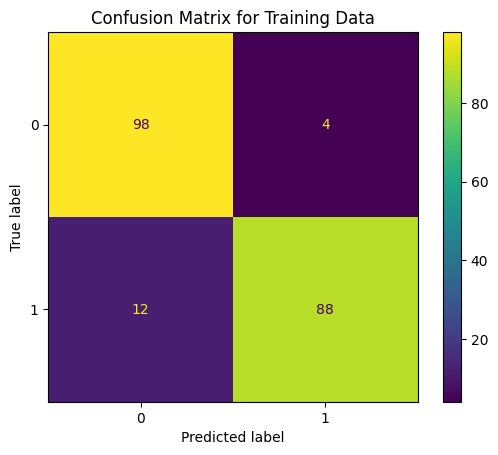

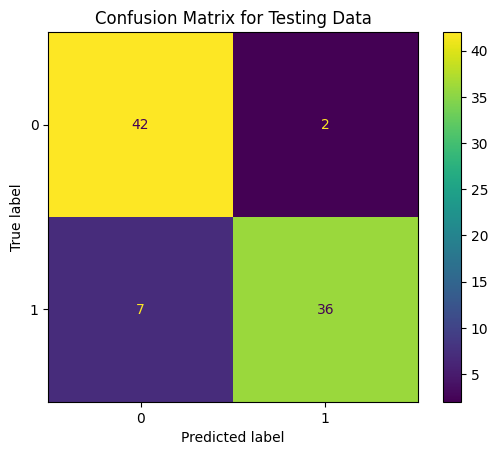

In [ ]:
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Evaluation on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print(f"Training Accuracy of SVM model: {train_accuracy:.2f}")
print(f"Training F1 score of SVM model: {train_f1:.2f}")

# Evaluation on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Testing Accuracy of SVM model: {test_accuracy:.2f}")
print(f"Testing F1 score of SVM model: {test_f1:.2f}")

# Confusion matrix for training data
train_cm = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(train_cm, display_labels=svm_model.classes_).plot()
plt.title('Confusion Matrix for Training Data')
plt.show()
print('\n')
# Confusion matrix for testing data
test_cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(test_cm, display_labels=svm_model.classes_).plot()
plt.title('Confusion Matrix for Testing Data')
plt.show() # 89TEST :  92 TRAIN

In [ ]:
''' APPLYING PCA '''
Cancer_Gene_Expression2=Cancer_Gene_Expression

Cancer_Gene_Expression2.head()

,NM_001030006,NM_003465,NM_198457,NM_001142595,NM_005993,NM_018043,NM_030930,NM_018428,NM_001012271,ENST00000390297,...,NM_021648,NM_145257,NM_003043,NM_002416,NM_005490,NM_002540,NM_001039876,NM_139266,NM_138455,type
0,9.335885,8.200043,9.088019,9.663021,9.249135,8.075102,9.491966,9.409306,6.463480,8.710697,...,9.519305,8.759507,9.659361,7.507731,7.857805,9.112335,8.396968,8.255637,10.592484,0
1,9.355895,17.949804,9.741750,9.313662,9.466928,7.584728,11.536375,9.806050,8.584755,8.756439,...,9.333402,10.934303,11.998590,10.906605,7.922778,8.905302,7.706535,9.942230,9.772597,0
2,8.940171,9.029850,9.126592,8.667140,9.493131,7.931419,9.082200,9.204320,5.607146,5.030750,...,9.644662,8.832881,9.426416,9.219844,7.217194,8.915891,7.662228,8.523312,9.810861,0
3,8.827419,8.242203,9.443400,8.990227,9.909982,9.742283,8.417662,9.216733,5.866810,9.663907,...,9.561637,8.820261,8.717582,8.297224,7.712426,8.457234,8.295426,8.574720,8.854017,0
4,8.858665,8.108319,9.650710,9.476275,9.745502,10.943115,8.536203,9.314986,6.879521,12.435743,...,10.067845,9.263084,8.741164,8.413487,9.540126,8.631661,11.034352,8.229872,9.769277,0


In [ ]:
A=Cancer_Gene_Expression2.drop(['type'], axis=1) # FEATURES
B=Cancer_Gene_Expression2.type                   # TARGETS

A

,NM_001030006,NM_003465,NM_198457,NM_001142595,NM_005993,NM_018043,NM_030930,NM_018428,NM_001012271,ENST00000390297,...,NM_001145712,NM_021648,NM_145257,NM_003043,NM_002416,NM_005490,NM_002540,NM_001039876,NM_139266,NM_138455
0,9.335885,8.200043,9.088019,9.663021,9.249135,8.075102,9.491966,9.409306,6.463480,8.710697,...,8.269421,9.519305,8.759507,9.659361,7.507731,7.857805,9.112335,8.396968,8.255637,10.592484
1,9.355895,17.949804,9.741750,9.313662,9.466928,7.584728,11.536375,9.806050,8.584755,8.756439,...,7.846192,9.333402,10.934303,11.998590,10.906605,7.922778,8.905302,7.706535,9.942230,9.772597
2,8.940171,9.029850,9.126592,8.667140,9.493131,7.931419,9.082200,9.204320,5.607146,5.030750,...,8.651862,9.644662,8.832881,9.426416,9.219844,7.217194,8.915891,7.662228,8.523312,9.810861
3,8.827419,8.242203,9.443400,8.990227,9.909982,9.742283,8.417662,9.216733,5.866810,9.663907,...,9.487481,9.561637,8.820261,8.717582,8.297224,7.712426,8.457234,8.295426,8.574720,8.854017
4,8.858665,8.108319,9.650710,9.476275,9.745502,10.943115,8.536203,9.314986,6.879521,12.435743,...,10.184196,10.067845,9.263084,8.741164,8.413487,9.540126,8.631661,11.034352,8.229872,9.769277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,10.316811,10.109273,10.012507,8.304989,9.424180,11.867967,9.664412,9.170618,12.200388,11.420186,...,7.695544,10.646899,9.215891,9.657696,12.817171,10.777648,10.073045,13.058120,10.572733,10.288518
285,10.211657,11.795695,9.498891,8.771831,10.462807,9.032303,11.020840,9.767774,12.085046,10.976965,...,8.508332,9.121832,9.296696,10.268594,15.059066,10.439510,9.689515,11.544157,11.331818,10.586595
286,9.250227,9.294641,8.943729,9.291650,9.605437,8.745795,10.234478,9.147709,8.229544,7.843314,...,8.551476,9.824571,8.700971,9.808987,11.516698,8.946186,9.443123,9.491749,9.653814,10.977796
287,9.409775,9.631159,9.659126,9.556983,9.213196,8.264987,11.378212,9.555782,11.771987,8.586103,...,10.395535,9.651572,10.282331,9.565606,13.105930,11.515789,10.728501,12.341015,11.702404,11.062514


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler2= StandardScaler()
A_scaled=scaler2.fit_transform(A)
A_scaled


from sklearn.decomposition import PCA
# pca=PCA(0.70)
# training accuracy:  0.8861386138613861
# Testing accuracy:  0.896551724137931
''' test size chota ho raha tha thats why there is slight overfitting'''

# pca=PCA(0.80)
# training accuracy:  0.900990099009901
# Testing accuracy:  0.8735632183908046

# pca=PCA(0.85)
# training accuracy:  0.900990099009901
# Testing accuracy:  0.9195402298850575
''' looks good '''

# pca=PCA(0.86)
# training accuracy:  0.900990099009901
# Testing accuracy:  0.9195402298850575

# pca=PCA(0.87)
# training accuracy:  0.900990099009901
# Testing accuracy:  0.896551724137931
''' slight increase in test size might have affected the testing accuracy '''
# pca=PCA(0.88)
# training accuracy:  0.905940594059406
# Testing accuracy:  0.896551724137931

# pca=PCA(0.89)
# training accuracy:  0.905940594059406
# Testing accuracy:  0.896551724137931

# pca=PCA(0.90)
# training accuracy:  0.9108910891089109
# Testing accuracy:  0.9080459770114943

''' hypothesis:
 out of 320 highly expressive cancer genes 90% of these genes are relevant
that us 288 genes

we ranked the highly express genes by evaluating mean for each class
pca therefore verifies that statistical feature exctraction was relevant
pca gives a mathematical and algorithmic support to our work

'''
pca=PCA(3) # reducing to 3d


# pca=PCA(0.95)
# training accuracy:  0.9207920792079208
# Testing accuracy:  0.9080459770114943


# pca=PCA(0.99)
# training accuracy:  0.9207920792079208
# Testing accuracy:  0.896551724137931
A_pca=pca.fit_transform(A_scaled)
A_pca

array([[ 1.07836940e+01,  1.58655919e+00, -2.88728330e-01],
       [ 4.81116913e+00,  1.34694610e+01, -3.57970624e+00],
       [ 1.48865971e+01,  1.22204449e+00, -7.88535379e-01],
       [ 1.26893814e+01, -3.23038151e+00,  4.27106171e+00],
       [ 2.20273019e+00, -6.29938587e+00,  6.01789008e+00],
       [ 5.81888782e+00, -3.44480906e+00,  2.67570269e+00],
       [ 6.37231214e+00, -1.46071149e-01,  1.52623495e+00],
       [ 1.23489210e+01, -2.90069759e+00, -3.20720353e+00],
       [ 1.68500605e+01, -1.86638342e+00, -5.88438963e+00],
       [ 8.67460601e+00, -2.56063009e+00,  7.61560577e-01],
       [ 9.95872296e+00, -4.88788717e+00, -6.73515984e+00],
       [ 1.60719367e+00, -3.57369590e+00,  8.15192843e-01],
       [ 4.28178238e+00, -4.06049564e+00, -4.64694522e+00],
       [ 1.75128360e+01, -1.13021778e+00, -6.47573752e+00],
       [ 1.11515193e+01,  3.20360514e+00, -2.06314140e+00],
       [ 9.83752867e+00, -2.13580565e+00, -8.52246948e-04],
       [ 1.62130169e+01, -1.97315527e+00

In [ ]:
A_pca.shape

(289, 3)

In [ ]:
pca.explained_variance_ratio_

array([0.37976945, 0.07227472, 0.06151347])

In [ ]:
A_train, A_test, B_train, B_test = model_selection.train_test_split(A_pca, B, test_size = 0.3, random_state = 42 , stratify=B)

In [ ]:
pca_df = pd.DataFrame(data=A_pca, columns=[f'PC{i+1}' for i in range(A_pca.shape[1])])
pca_df['Class'] = B_train
pca_df.head()

,PC1,PC2,PC3,Class
0,10.783694,1.586559,-0.288728,0.0
1,4.811169,13.469461,-3.579706,NaN
2,14.886597,1.222044,-0.788535,NaN
3,12.689381,-3.230382,4.271062,0.0
4,2.202730,-6.299386,6.017890,0.0


In [ ]:
pca_df=pca_df.dropna(subset=['Class'])

In [ ]:
pca_df

,PC1,PC2,PC3,Class
0,10.783694,1.586559,-0.288728,0.0
3,12.689381,-3.230382,4.271062,0.0
4,2.202730,-6.299386,6.017890,0.0
5,5.818888,-3.444809,2.675703,0.0
6,6.372312,-0.146071,1.526235,0.0
...,...,...,...,...
282,-13.404371,-1.836074,-1.649001,1.0
283,-17.808050,0.290632,-3.679929,1.0
285,-11.844119,6.018709,-6.337495,1.0
286,4.378348,0.867341,-5.351393,1.0


<Figure size 1000x1000 with 0 Axes>

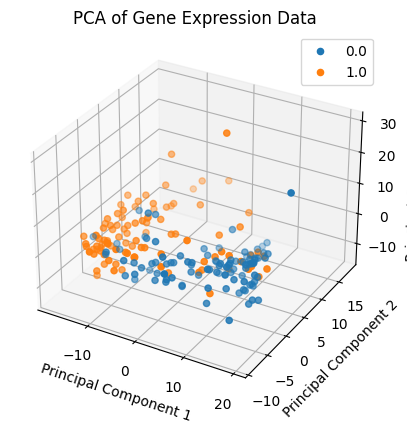

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(10, 10))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for label in pca_df['Class'].unique():
    ax.scatter(pca_df.loc[pca_df['Class'] == label, 'PC1'],
                pca_df.loc[pca_df['Class'] == label, 'PC2'],
                 pca_df.loc[pca_df['Class'] == label, 'PC3'],
                label=label)
plt.title('PCA of Gene Expression Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.legend()
plt.show()

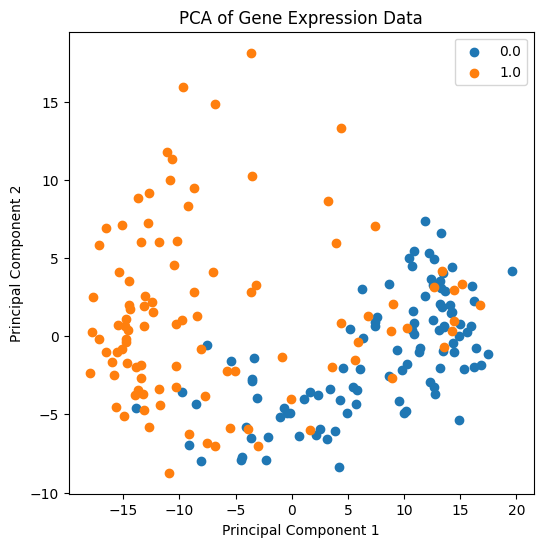

In [ ]:
plt.figure(figsize=(6, 6))

for label in pca_df['Class'].unique():
    plt.scatter(pca_df.loc[pca_df['Class'] == label, 'PC1'],
                pca_df.loc[pca_df['Class'] == label, 'PC2'],

                label=label)
plt.title('PCA of Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.legend()
plt.show()

In [ ]:
svm2_model = SVC(random_state=42)
svm2_model.fit(A_train, B_train)
print("training accuracy: ",svm2_model.score(A_train, B_train))
print("Testing accuracy: ",svm2_model.score(A_test, B_test))

training accuracy:  0.8465346534653465
Testing accuracy:  0.8160919540229885
